In [12]:
# Source - https://stackoverflow.com/a
# Posted by pv., modified by community. See post 'Timeline' for change history
# Retrieved 2025-12-06, License - CC BY-SA 3.0

%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt

from cb25d.batch import run_batch_simulation
from cb25d.compare_gamma_original import run_gamma_comparison_original
from cb25d.interactive import run_interactive_simulation
from cb25d.notebook import init, savefig
import time

from cb25d.interactive import run_interactive_simulation
from cb25d.simulation_impl_ext import (
    generate_extended_initial_conditions, 
    SimulationRecorderExtended
)

# np.random.seed(42) # For reproducibility ?



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# Comparing to the 'original' model by approximating its behavior
initial_state_ext = generate_extended_initial_conditions(
    # copied from 'original' model parameters
    seed=1,
    n=100,
    k=1,
    gamma_att=0.37,
    gamma_ali=0.2,
    gamma_rand=0.2,
    l_att=3.0,
    l_ali=3.0,
    tau_0=0.8,
    tau_n_mean=1.0,
    l_n_mean=1.0,
    eta=0.8,
    
    # Extension Parameters to Mimic Original Model
    # Make the burst phase nearly instantaneous
    # A very small, non-zero duty cycle
    omega=1e-10,
    # Only one decision instant per "burst"      
    n_omega=1,
)

start = time.time()
run_batch_simulation(
    initial_state_ext,
    rec_extended := SimulationRecorderExtended(skip_first_n=1000),
    steps=50000,
)
end = time.time()

print("Extended Model (Approximation) Results")
# The recorder for the extended model accumulates totals, so we average them
num_samples = rec_extended.total_samples - rec_extended.skip_first_n
avg_dispersion = rec_extended.total_dispersion / num_samples if num_samples > 0 else 0
avg_polarization = rec_extended.total_polarization / num_samples if num_samples > 0 else 0
avg_milling = rec_extended.total_milling / num_samples if num_samples > 0 else 0

print(f"Avg Dispersion: {avg_dispersion}")
print(f"Avg Polarization: {avg_polarization}")
print(f"Avg Milling: {avg_milling}")
print(f"Batch simulation time: {end - start} seconds")
print(rec_extended.polarization)
print(rec_extended.dispersion)
print(rec_extended.milling)

Extended Model (Approximation) Results
Avg Dispersion: 64.00455584564473
Avg Polarization: 0.12267956320283672
Avg Milling: 0.013130864392895783
Batch simulation time: 10.016746520996094 seconds
0.12267956320283672
64.00455584564473
0.013130864392895783


Testing Omega = 0.1...
Testing Omega = 0.3...
Testing Omega = 0.5...
Testing Omega = 0.7...
Testing Omega = 0.9...


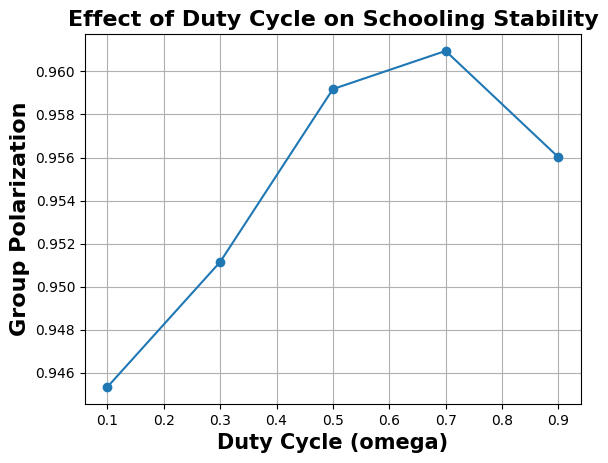

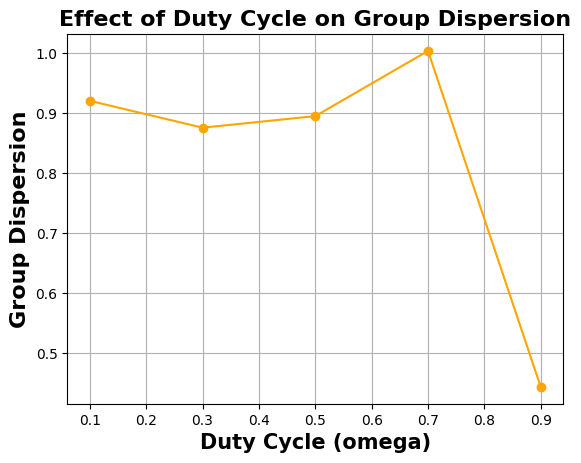

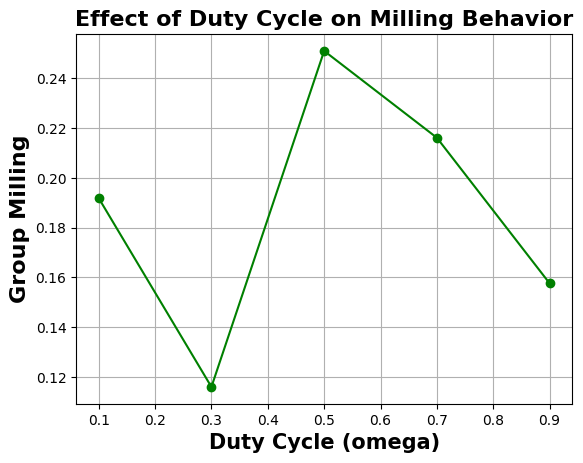

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from cb25d.batch import run_batch_simulation
from cb25d.simulation_impl_ext import generate_extended_initial_conditions, SimulationRecorderExtended
# Test different omega values

omega_values = [0.1, 0.3, 0.5, 0.7, 0.9]
results = []

rec = SimulationRecorderExtended(skip_first_n=2000)
for w in omega_values:
    print(f"Testing Omega = {w}...")
    # Initialize
    state = generate_extended_initial_conditions(
        seed=100, 
        n=50, 
        l_att=3.0, 
        omega=w,
        n_omega=5, 
        gamma_att=0.22,
        gamma_ali=0.6
    )
    
    # Record
    rec = SimulationRecorderExtended(skip_first_n=2000)
    run_batch_simulation(state, rec, steps=50000)
    results.append(rec)

# Plot polarization vs omega
plt.plot(omega_values, [rec.polarization for rec in results], marker='o')
plt.title("Effect of Duty Cycle on Schooling Stability", fontsize=16, fontweight='bold')
plt.xlabel("Duty Cycle (omega)", fontsize=15, fontweight='bold')
plt.ylabel("Group Polarization", fontsize=16, fontweight='bold')
plt.grid(True)
plt.savefig("polarization_vs_omega.pdf", bbox_inches="tight")
plt.show()

# Plot dispersion vs omega
plt.plot(omega_values, [rec.dispersion for rec in results], marker='o', color='orange')
plt.title("Effect of Duty Cycle on Group Dispersion", fontsize=16, fontweight='bold')
plt.xlabel("Duty Cycle (omega)", fontsize=15, fontweight='bold')
plt.ylabel("Group Dispersion", fontsize=16, fontweight='bold')
plt.grid(True)
plt.savefig("dispersion_vs_omega.pdf", bbox_inches="tight")
plt.show()

# Plot milling vs omega
plt.plot(omega_values, [rec.milling for rec in results], marker='o', color='green')
plt.title("Effect of Duty Cycle on Milling Behavior", fontsize=16, fontweight='bold')
plt.xlabel("Duty Cycle (omega)", fontsize=15, fontweight='bold')
plt.ylabel("Group Milling", fontsize=16, fontweight='bold')
plt.grid(True)
plt.savefig("milling_vs_omega.pdf", bbox_inches="tight")
plt.show()




Testing n_omega = 1...
Testing n_omega = 3...
Testing n_omega = 5...
Testing n_omega = 7...
Testing n_omega = 9...


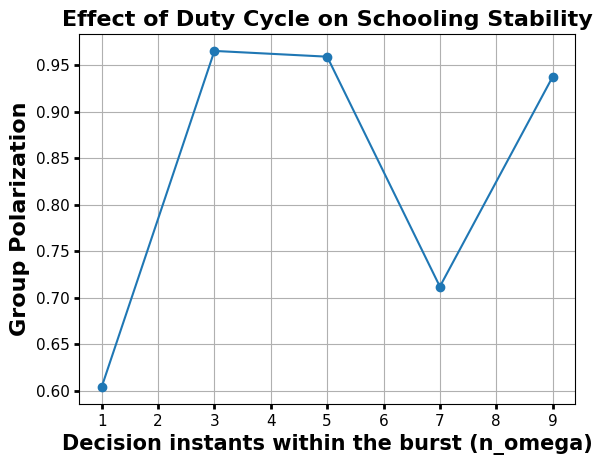

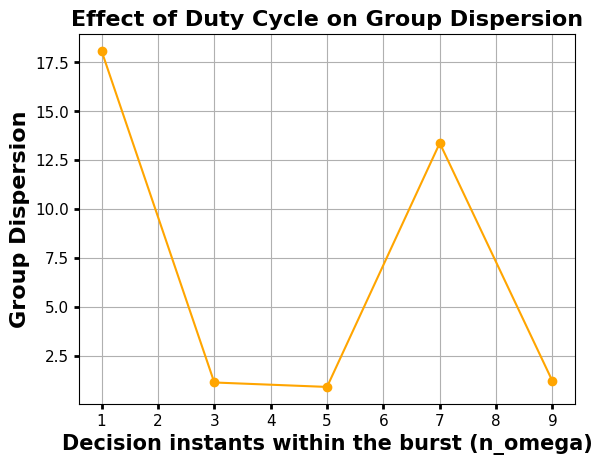

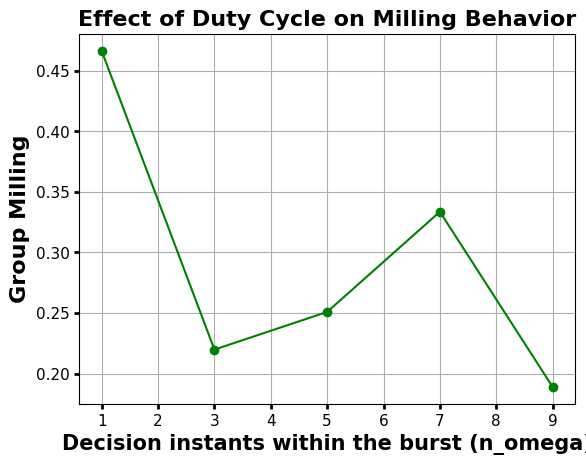

In [16]:
# Test different n_omega values
n_omega_values = [1, 3, 5, 7, 9]
results = []

rec = SimulationRecorderExtended(skip_first_n=2000)
for n_omega in n_omega_values:
    print(f"Testing n_omega = {n_omega}...")
    # Initialize
    state = generate_extended_initial_conditions(
        seed=100, 
        n=50, 
        l_att=3.0, 
        omega=0.5,
        n_omega=n_omega, 
        gamma_att=0.22,
        gamma_ali=0.6
    )
    
    # Record
    rec = SimulationRecorderExtended(skip_first_n=2000)
    run_batch_simulation(state, rec, steps=50000)
    results.append(rec)

# Plot polarization vs omega
plt.plot(n_omega_values, [rec.polarization for rec in results], marker='o')
plt.title("Effect of Duty Cycle on Schooling Stability", fontsize=16, fontweight='bold')
plt.xlabel("Decision instants within the burst (n_omega)", fontsize=15, fontweight='bold')
plt.ylabel("Group Polarization", fontsize=16, fontweight='bold')
plt.tick_params(axis='both', labelsize=11, width=2)
plt.grid(True)
plt.savefig("polarization_vs_n_omega.pdf", bbox_inches='tight')
plt.show()

# Plot dispersion vs omega
plt.plot(n_omega_values, [rec.dispersion for rec in results], marker='o', color='orange')
plt.title("Effect of Duty Cycle on Group Dispersion", fontsize=16, fontweight='bold')
plt.xlabel("Decision instants within the burst (n_omega)", fontsize=15, fontweight='bold')
plt.ylabel("Group Dispersion", fontsize=16, fontweight='bold')
plt.tick_params(axis='both', labelsize=11, width=2)
plt.grid(True)
plt.savefig("dispersion_vs_n_omega.pdf", bbox_inches='tight')
plt.show()

# Plot milling vs omega
plt.plot(n_omega_values, [rec.milling for rec in results], marker='o', color='green')
plt.title("Effect of Duty Cycle on Milling Behavior", fontsize=16, fontweight='bold')
plt.xlabel("Decision instants within the burst (n_omega)", fontsize=15, fontweight='bold')
plt.ylabel("Group Milling", fontsize=16, fontweight='bold')
plt.tick_params(axis='both', labelsize=11, width=2)
plt.grid(True)
plt.savefig("milling_vs_n_omega.pdf", bbox_inches='tight')
plt.show()



In [28]:
print(results)
for r in results:
    print(r.total_polarization)

[SimulationRecorderExtended(skip_first_n=2000, total_samples=50000, total_dispersion=np.float64(44180.91036004922), total_polarization=np.float64(45376.285504635845), total_milling=np.float64(9208.8767769198)), SimulationRecorderExtended(skip_first_n=2000, total_samples=50000, total_dispersion=np.float64(42034.35283692162), total_polarization=np.float64(45655.099979153005), total_milling=np.float64(5572.4506434312)), SimulationRecorderExtended(skip_first_n=2000, total_samples=50000, total_dispersion=np.float64(42959.06033767998), total_polarization=np.float64(46040.65003035152), total_milling=np.float64(12044.023894486461)), SimulationRecorderExtended(skip_first_n=2000, total_samples=50000, total_dispersion=np.float64(48171.402164841995), total_polarization=np.float64(46125.74485919903), total_milling=np.float64(10371.49107577712)), SimulationRecorderExtended(skip_first_n=2000, total_samples=50000, total_dispersion=np.float64(21308.053097400836), total_polarization=np.float64(45888.707

In [ ]:
# To replicate the "Schooling" phase from the paper
initial_state_schooling = generate_extended_initial_conditions(
    seed=42,
    n=100,        
    k=1,

    gamma_att=0.22,
    gamma_ali=0.6,
    
    l_att=3.0,
    l_ali=3.0,
    gamma_rand=0.2,
    tau_0=0.8,
    tau_n_mean=1.0,
    l_n_mean=1.0,
    eta=0.8,
    
    # Extension Parameters to Mimic Original Model
    # Make the burst phase nearly instantaneous
    omega=0.01,
    n_omega=1,
)

In [ ]:
# To replicate the "Milling" phase from the paper
initial_state_milling = generate_extended_initial_conditions(
    seed=42,
    n=100,
    k=1,

    gamma_att=0.37,
    gamma_ali=0.2,

    l_att=3.0,
    l_ali=3.0,
    gamma_rand=0.2,
    tau_0=0.8,
    eta=0.8,

    # Extension Parameters to Mimic Original Model
    # Make the burst phase nearly instantaneous
    omega=0.01,
    n_omega=1,
)

In [ ]:
# To replicate the "Swarming" phase from the paper
initial_state_swarming = generate_extended_initial_conditions(
    seed=42,
    n=100,
    k=1,
    
    gamma_att=0.6,
    gamma_ali=0.6,
    
    l_att=3.0,

    # Extension Parameters to Mimic Original Model
    # Make the burst phase nearly instantaneous
    omega=0.01,
    n_omega=1,
)